# 1 PCA与SVD

## 1.1 PCA重要参数n_components
n_components是我们降维后需要的维度，即降维后需要保留的特征数量，一般输入[0,min(X.shape)]范围中的整数。一说到K，可能都会想到，类似于KNN中的K和随机森林中的n_estimators，这是一个需要我们人为去确认的超参数，并且我们设定的数字会影响到模型的表现。如果留下的特征太多，就达不到降维的效果，如果留下的特征太少，那新特征向量可能无法容纳原始数据集中的大部分信息，因此，n_components既不能太大也不能太小。那怎么办呢？

可以先从我们的降维目标说起：**如果我们希望可视化一组数据来观察数据分布，我们往往将数据降到三维以下，很多时候是二维，即n_components的取值为2**。

### 1.1.1 小案例：高维数据的可视化


1. **调用库和模块**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

2. **提取数据集**

In [2]:
iris = load_iris()
y = iris.target
X = iris.data

# 作为数组，X是几维？
X.shape  # (150, 4)  二维
#作为数据表或特征矩阵，X是几维？
import pandas as pd

pd.DataFrame(X).head()  # 四维

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


3. **建模**

In [3]:
pca = PCA(n_components=2)
pca = pca.fit(X)
X_dr = pca.transform(X)
X_dr
#也可以fit_transform一步到位
#X_dr = PCA(2).fit_transform(X)

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

4. **可视化**

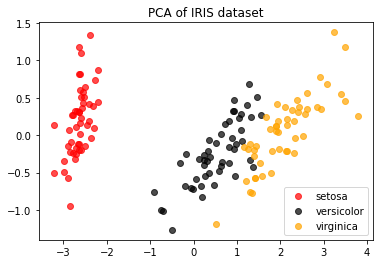

In [8]:
#要将三种鸢尾花的数据分布显示在二维平面坐标系中，对应的两个坐标（两个特征向量）应该是三种鸢尾花降维后的x1和x2
#要展示三中分类的分布，需要对三种鸢尾花分别绘图
#可以写成三行代码，也可以写成for循环
# plt.figure()
# plt.scatter(X_dr[y==0, 0], X_dr[y==0, 1], c="red", label=iris.target_names[0])
# plt.scatter(X_dr[y==1, 0], X_dr[y==1, 1], c="black", label=iris.target_names[1])
# plt.scatter(X_dr[y==2, 0], X_dr[y==2, 1], c="orange", label=iris.target_names[2])
# plt.legend()
# plt.title('PCA of IRIS dataset')
# plt.show()

colors = ['red', 'black', 'orange']
plt.figure()
for i in [0, 1, 2]:
    plt.scatter(X_dr[y == i, 0], X_dr[y == i, 1], alpha=0.7, c=colors[i], label=iris.target_names[i])
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()

鸢尾花的分布被展现在我们眼前了，明显这是一个分簇的分布，并且每个簇之间的分布相对比较明显，也许versicolor和virginia这两种花之间会有一些分类错误，但setosa肯定不会被分错。这样的数据很容易分类，可以预见，KNN，随机森林，神经网络，朴素贝叶斯，Adaboost这些分类器在鸢尾花数据集上，未调整的时候都可以有95%上下的准确率。

6. **探索降维后的数据**

In [11]:
#属性explained_variance_，查看降维后每个新特征向量上所带的信息量大小（可解释性方差的大小）
pca.explained_variance_
#属性explained_variance_ratio，查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比
# #又叫做可解释方差贡献率
pca.explained_variance_ratio_  #可见大部分信息都被有效地集中在了第一个特征上

pca.explained_variance_ratio_.sum()  # 降维后的两个特征保留了原始数据的97.77%左右的信息量

0.9776852063187951

7. **选择最好的n_components：累积可解释方差贡献率曲线**

当参数n_components中不填写任何值，则默认返回min(X.shape)个特征，一般来说，样本量都会大于特征数目，所以什么都不填就相当于转换了新特征空间，但没有减少特征的个数。一般来说，不会使用这种输入方式。但我们却可以使用这种输入方式来画出累计可解释方差贡献率曲线，以此选择最好的n_components的整数取值。

累积可解释方差贡献率曲线是一条以降维后保留的**特征个数为横坐标**，降维后新特征矩阵捕捉到的**可解释方差贡献率为纵坐标**的曲线，能够帮助我们决定n_components最好的取值。

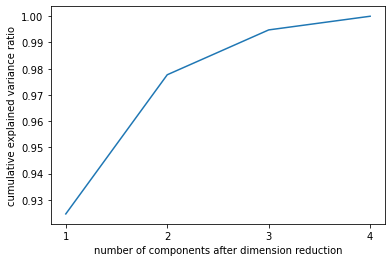

In [14]:
import numpy as np

pca_line = PCA().fit(X)
plt.plot([1, 2, 3, 4], np.cumsum(pca_line.explained_variance_ratio_))  # cumsum：累计求和函数
plt.xticks([1, 2, 3, 4])  #这是为了限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

### 1.1.2 最大似然估计自选超参数
除了输入整数，n_components还有哪些选择呢？矩阵分解的理论发展在业界独树一帜，勤奋智慧的数学大神Minka,T.P.在麻省理工学院媒体实验室做研究时找出了让PCA用最大似然估计(maximumlikelihoodestimation)自选超参数的方法，输入"**mle**"作为n_components的参数输入，就可以调用这种方法。

In [17]:
pca_mle = PCA(n_components="mle")
pca_mle = pca_mle.fit(X)
X_mle = pca_mle.transform(X)
X_mle
#可以发现，mle为我们自动选择了3个特征
pca_mle.explained_variance_ratio_.sum()
#得到了比设定2个特征时更高的信息含量，对于鸢尾花这个很小的数据集来说，3个特征对应这么高的信息含量，并不需要去纠结于只保留2个特征，毕竟三个特征也可以可视化

0.9947878161267248

### 1.1.3 按信息量占比选超参数
输入[0,1]之间的浮点数，并且让参数**svd_solver=='full'**，表示希望降维后的总解释性方差占比大于n_components指定的百分比，即是说，希望保留百分之多少的信息量。比如说，如果我们希望保留97%的信息量，就可以输入n_components=0.97，PCA会自动选出能够让保留的信息量超过97%的特征数量。

In [22]:
pca_f = PCA(n_components=0.97, svd_solver="full")  # svd_solver是奇异值分解器的意思
pca_f = pca_f.fit(X)
X_f = pca_f.transform(X)
pca_f.explained_variance_ratio_

array([0.92461872, 0.05306648])

## 1.2 PCA中的SVD

### 1.2.1 PCA中的SVD哪里来？
**为什么PCA的类里会包含控制SVD分解器的参数?**
sklearn将降维流程拆成了两部分：一部分是计算特征空间V，由奇异值分解完成，另一部分是映射数据和求解新特征矩阵，由主成分分析完成，实现了用SVD的性质减少计算量，却让信息量的评估指标是方差。

通过SVD和PCA的合作，sklearn实现了一种计算更快更简单，但效果却很好的“合作降维“。很多人理解SVD，是把SVD当作PCA的一种求解方法，其实指的就是在矩阵分解时不使用PCA本身的特征值分解，而使用奇异值分解来减少计算量。这种方法确实存在，但在sklearn中，矩阵U和Σ虽然会被计算出来（同样也是一种比起PCA来说简化非常多的数学过程，不产生协方差矩阵），但完全不会被用到，也无法调取查看或者使用，因此我们可以认为，U和Σ在fit过后就被遗弃了。奇异值分解追求的仅仅是V，只要有了V，就可以计算出降维后的特征矩阵。在transform过程之后，fit中奇异值分解的结果除了V(k,n)以外，就会被舍弃，而V(k,n)会被保存在属性components_当中，可以调用查看。

In [24]:
PCA(2).fit(X).components_
PCA(2).fit(X).components_.shape  # 返回的2即我们希望保留的特征数，4为原数据中的特征数

(2, 4)

### 1.2.2 重要参数 svd_solver 与 random_state
参数svd_solver是在降维过程中，用来控制矩阵分解的一些细节的参数。有四种模式可选："auto", "full", "arpack", "randomized"，默认”auto"。
- "**auto**"：基于X.shape和n_components的默认策略来选择分解器：如果输入数据的尺寸大于500x500且要提取的特征数小于数据最小维度min(X.shape)的80％，就启用效率更高的”randomized“方法。否则，精确完整的SVD将被计算，截断将会在矩阵被分解完成后有选择地发生.
- "**full**"：从scipy.linalg.svd中调用标准的LAPACK分解器来生成精确完整的SVD，**适合数据量比较适中，计算时间充足的情况**
- "**arpack**"：从scipy.sparse.linalg.svds调用ARPACK分解器来运行截断奇异值分解(SVDtruncated)，分解时就将特征数量降到n_components中输入的数值k，**可以加快运算速度，适合特征矩阵很大的时候，但一般用于特征矩阵为稀疏矩阵的情况**，此过程包含一定的随机性
- "**randomized**"，通过Halko等人的随机方法进行随机SVD。在"full"方法中，分解器会根据原始数据和输入的n_components值去计算和寻找符合需求的新特征向量，但是在"randomized"方法中，分解器会先生成多个随机向量，然后一一去检测这些随机向量中是否有任何一个符合我们的分解需求，如果符合，就保留这个随机向量，并基于这个随机向量来构建后续的向量空间。这个方法已经被Halko等人证明，比"full"模式下计算快很多，并且还能够保证模型运行效果。**适合特征矩阵巨大，计算量庞大的情况**。

而参数random_state在参数svd_solver的值为"arpack" or "randomized"的时候生效，可以控制这两种SVD模式中 的随机模式。**通常我们就选用”auto“**，不必对这个参数纠结太多。

### 1.2.3 重要属性components_
现在我们了解了，V(k,n)是新特征空间，是我们要将原始数据进行映射的那些新特征向量组成的矩阵。我们用它来计算新的特征矩阵，但我们希望获取的毕竟是X_dr，为什么我们要把V(k,n)这个矩阵保存在n_components这个属性当中来让大家调取查看呢？

我们之前谈到过PCA与特征选择的区别，即特征选择后的特征矩阵是可解读的，而PCA降维后的特征矩阵式不可解读的：PCA是将已存在的特征进行压缩，降维完毕后的特征不是原本的特征矩阵中的任何一个特征，而是通过某些方式组合起来的新特征。通常来说，**在新的特征矩阵生成之前，我们无法知晓PCA都建立了怎样的新特征向量，新特征矩阵生成之后也不具有可读性**，我们无法判断新特征矩阵的特征是从原数据中的什么特征组合而来，新特征虽然带有原始数据的信息，却已经不是原数据上代表着的含义了。

但是其实，在矩阵分解时，PCA是有目标的：在原有特征的基础上，找出能够让信息尽量聚集的新特征向量。在sklearn使用的PCA和SVD联合的降维方法中，这些新特征向量组成的新特征空间其实就是V(k,n)。当V(k,n)是数字时，我们无法判断V(k,n)和原有的特征究竟有着怎样千丝万缕的数学联系。但是，如果原特征矩阵是图像，V(k,n)这个空间矩阵也可以被可视化的话，我们就可以通过两张图来比较，就可以看出新特征空间究竟从原始数据里提取了什么重要的信息。

让我们来看一个，人脸识别中属性components_的运用。

1. **导入需要的库和模块**

In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np

2. **实例化数据集，探索数据**

In [5]:
faces = fetch_lfw_people(min_faces_per_person=60)
# 观察下数据维度
faces.images.shape  # (1348, 62, 47) 三维
# 其中1348是矩阵中图像的个数，62是每个图像矩阵的行，47是每个图像矩阵的特征。即有62*47个像素决定一张图，这里共有1348张图
faces.data.shape  # (1348, 2914)  行是样本，列是样本相关的所有特征 (2914=62*47)

X = faces.data

3. **看看图像什么样？将原特征矩阵进行可视化**

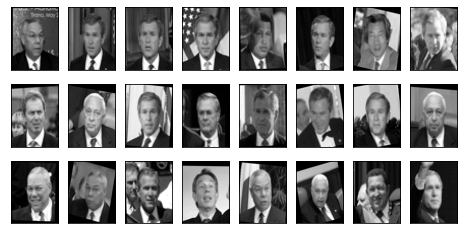

In [25]:
#数据本身是图像，和数据本身只是数字，使用的可视化方法不同
#创建 画布和子图对象
fig, axes = plt.subplots(3, 8, figsize=(8, 4), subplot_kw={"xticks": [], "yticks": []})  #不要显示子图的坐标轴

# fig
# axes

#不难发现，axes中的一个对象对应fig中的一个空格#我们希望，在每一个子图对象中填充图像（共24张图），因此我们需要写一个在子图对象中遍历的循环

# axes.shape  # (3,8)
#二维结构，可以有两种循环方式，一种是使用索引，循环一次同时生成一列上的四个图
#另一种是把数据拉成一维，循环一次只生成一个图
#在这里，究竟使用哪一种循环方式，是要看我们要画的图的信息，储存在一个怎样的结构里
#我们使用 子图对象.imshow 来将图像填充到空白画布上
#而imshow要求的数据格式必须是一个(m,n)格式的矩阵，即每个数据都是一张单独的图
#因此我们需要遍历的是faces.images，其结构是(1348, 62, 47)
#要从一个数据集中取出24个图，明显是一次性的循环切片[i,:,:]来得便利
#因此我们要把axes的结构拉成一维来循环
# axes.flat
# enumerate(axes.flat)  # 添加索引

#填充图像
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i, :, :]
              , cmap="gray")  # 选择色彩的模式为灰色
#https://matplotlib.org/tutorials/colors/colormaps.html

4. **建模降维，提取新特征空间矩阵**

In [33]:
#原本有2914维，我们现在来降到150维
pca = PCA(150).fit(X)

V = pca.components_
V.shape

(150, 2914)

5. **将新特征空间矩阵可视化**

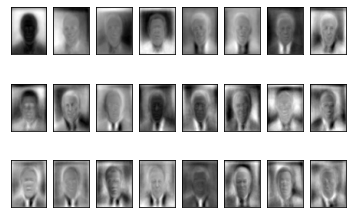

In [34]:
fig, axes = plt.subplots(3, 8, subplot_kw={"xticks": [], "yticks": []})
for i, ax in enumerate(axes.flat):
    ax.imshow(V[i, :].reshape(62, 47), cmap="gray")

这张图稍稍有一些恐怖，但可以看出，比起降维前的数据，新特征空间可视化后的人脸非常模糊，这是因为原始数据还没有被映射到特征空间中。但是可以看出，整体比较亮的图片，获取的信息较多，整体比较暗的图片，却只能看见黑漆漆的一块。在比较亮的图片中，眼睛，鼻子，嘴巴，都相对清晰，脸的轮廓，头发之类的比较模糊。

这说明，新特征空间里的特征向量们，大部分是"五官"和"亮度"相关的向量，所以新特征向量上的信息肯定大部分是由原数据中和"五官"和"亮度"相关的特征中提取出来的。到这里，我们通过可视化新特征空间V，解释了一部分降维后的特征：虽然显示出来的数字看着不知所云，但画出来的图表示，这些特征是和”五官“以及”亮度“有关的。这也再次证明了，PCA能够将原始数据集中重要的数据进行聚集。

## 1.3 重要接口inverse_transform
在前几章学习中了解到了接口inverse_transform，可以将我们归一化，标准化，甚至做过哑变量的特征矩阵还原回原始数据中的特征矩阵，这几乎在向我们暗示，任何有inverse_transform这个接口的过程都是可逆的。PCA应该也是如此。在sklearn中，我们通过让原特征矩阵X右乘新特征空间矩阵V(k,n)来生成新特征矩阵X_dr，那理论上来说，让新特征矩阵X_dr右乘V(k,n)的逆矩阵，就可以将新特征矩阵X_dr还原为X。那sklearn是否这样做了呢？让我们来看看下面的案例。

### 1.3.1迷你案例：用人脸识别看PCA降维后的信息保存量
人脸识别是最容易的，用来探索inverse_transform功能的数据。我们先调用一组人脸数据X(m,n)，对人脸图像进行绘制，然后我们对人脸数据进行降维得到X_dr，之后再使用inverse_transform(X_dr)返回一个X_inverse(m,n)，并对这个新矩阵中的人脸图像也进行绘制。如果PCA的降维过程是可逆的，我们应当期待X(m,n)和X_inverse(m,n)返回一模一样的图像，即携带一模一样的信息。

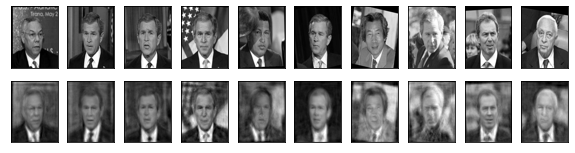

In [39]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

faces = fetch_lfw_people(min_faces_per_person=60)
X = faces.data
pca = PCA(150)
X_dr = pca.fit_transform(X)
X_dr.shape  # (1348, 150)

# 将降维后的数据逆转回原空间
X_inverse = pca.inverse_transform(X_dr)
X_inverse.shape  # (1348,2914)
# 可视化逆转回的数据
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5), subplot_kw={"xticks": [], "yticks": []})
#和上面的案例一样，我们需要对子图对象进行遍历的循环，来将图像填入子图中
#那在这里，我们使用怎样的循环？
#现在我们的ax中是2行10列，作为对比：第一行是原数据，第二行是inverse_transform后返回的数据
#所以我们需要同时循环两份数据，即一次循环画一列上的两张图，而不是把ax拉平
for i in range(10):
    ax[0, i].imshow(faces.images[i, :, :], cmap="binary_r")
    ax[1, i].imshow(X_inverse[i].reshape(62, 47), cmap="binary_r")


可以明显看出，这两组数据可视化后，由降维后再通过inverse_transform转换回原维度的数据画出的图像和原数据画的图像大致相似，但原数据的图像明显更加清晰。这说明，inverse_transform并没有实现数据的完全逆转。这是因为，在降维的时候，部分信息已经被舍弃了，X_dr中往往不会包含原数据100%的信息，所以在逆转的时候，即便维度升高，原数据中已经被舍弃的信息也不可能再回来了。所以，**降维不是完全可逆的**。

inverse_transform的功能，是基于X_dr中的数据进行升维，将数据重新映射到原数据所在的特征空间中，而并非恢复所有原有的数据。但同时，我们也可以看出，降维到300以后的数据，的确保留了原数据的大部分信息，所以图像看起来，才会和原数据高度相似，只是稍稍模糊罢了。

### 1.3.2 迷你案例：用PCA做噪音过滤
降维的目的之一就是希望抛弃掉对模型带来负面影响的特征，而我们相信，带有效信息的特征的方差应该是远大于噪音的，所以相比噪音，有效的特征所带的信息应该不会在PCA过程中被大量抛弃。inverse_transform能够在不恢复原始数据的情况下，将降维后的数据返回到原本的高维空间，即是说能够实现”保证维度，但去掉方差很小特征所带的信息“。利用inverse_transform的这个性质，我们能够实现噪音过滤。

1. **导入数字识别数据，定义画图函数，画出原图像**

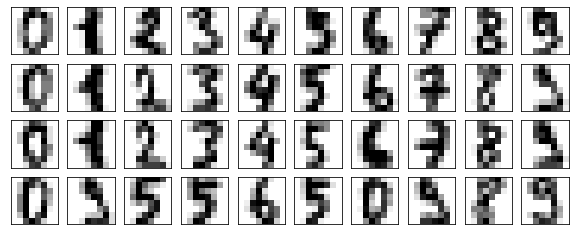

In [48]:
from sklearn.datasets import load_digits  # 数字识别数据
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
digits.data.shape  # (1797,64)


# 定义一个画图的函数
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4)
                             , subplot_kw={"xticks": [], "yticks": []}
                             )
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap="binary")


plot_digits(digits.data)  # 原数据图像

2. **人为给数据加上噪声**

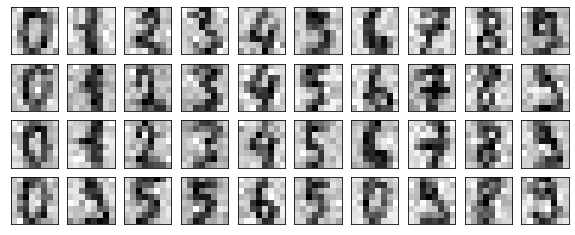

In [54]:
np.random.RandomState(42)
#在指定的数据集中，随机抽取服从正态分布的数据
#两个参数，分别是指定的数据集，和抽取出来的正太分布的方差
noisy = np.random.normal(digits.data, 2)

plot_digits(noisy)  # 有噪声的数据图像

3. **噪声数据降维后再逆转回来实现降噪**

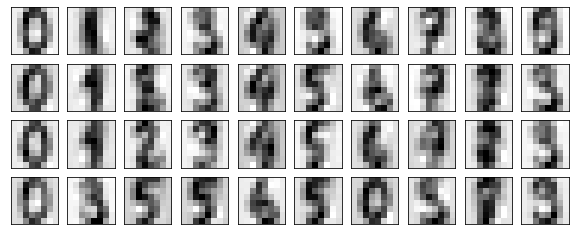

In [65]:
pca = PCA(0.5, svd_solver="full").fit(noisy)  # 降维后保留60%的信息量
X_dr = pca.transform(noisy)
# X_dr.shape # (1797,6)
X_without_noisy = pca.inverse_transform(X_dr)
plot_digits(X_without_noisy)  # 降噪后的数据图像

## 1.4 重要接口，参数和属性总结
到现在，我们已经完成了对PCA的讲解。我们讲解了重要参数参数n_components，svd_solver，random_state， 讲解了三个重要属性：components_, explained_variance_以及explained_variance_ratio_，无数次用到了接口fit，transform，fit_transform，还讲解了与众不同的重要接口inverse_transform。

# 2 案例：PCA对手写数字数据集的降维
在前一章手写数字的特征选择中，数据集结构为(42000,784)，用KNN跑一次半小时，得到准确率在96.6%上下，用随机森林跑一次12秒，准确率在93.8%，虽然KNN效果好，但由于数据量太大，KNN计算太缓慢，所以我们不得不选用随机森林。我们使用了各种技术对手写数据集进行特征选择，最后使用嵌入法SelectFromModel选出了461个特征，将随机森林的效果也调到了96%以上。但是，因为数据量依然巨大，还是有400多个特征。这里就来试着用PCA处理一下这个数据，看看效果如何。

1. **导入数据**

In [1]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("D:/PycharmProjects/机器学习/3、数据预处理与特征工程/digit recognizor.csv")
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
X.shape

(42000, 784)

2. **画累计方差贡献率曲线，找最佳降维后维度的范围**

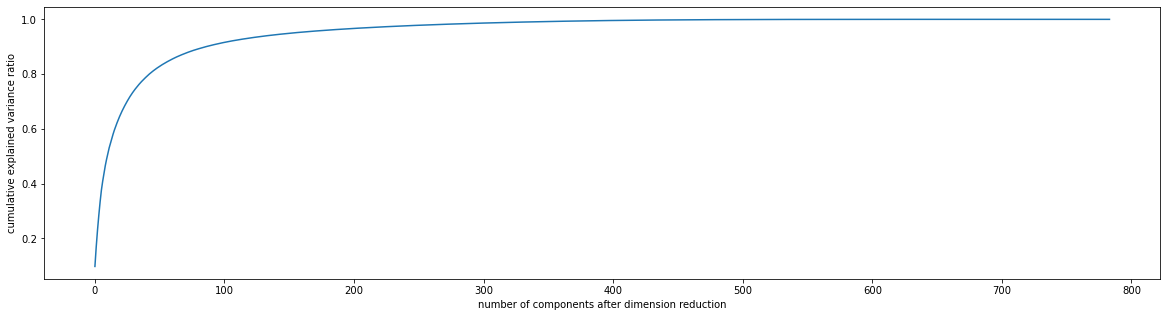

In [2]:
pca_line = PCA().fit(X)
plt.figure(figsize=[20, 5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))  # cumsum：累计求和函数
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

3. **降维后维度的学习曲线，继续缩小最佳维度的范围**

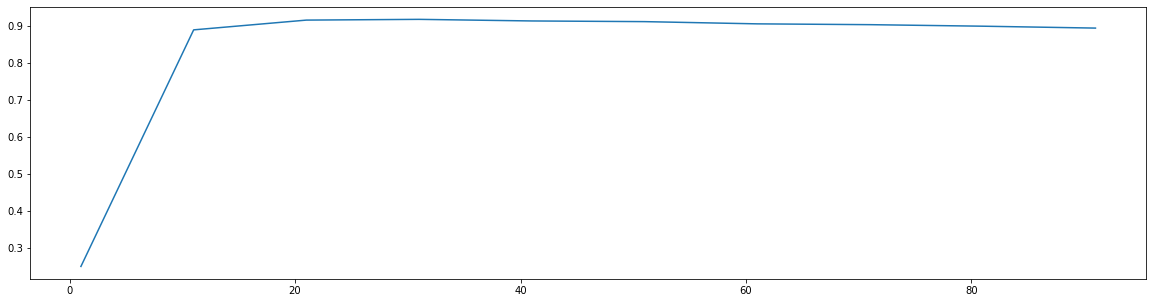

In [3]:
score = []
for i in range(1, 101, 10):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10, random_state=0), X_dr, y, cv=5).mean()
    score.append(once)
plt.figure(figsize=[20, 5])
plt.plot(range(1, 101, 10), score)
plt.show()

4. **细化学习曲线，找出降维后的最佳维度**

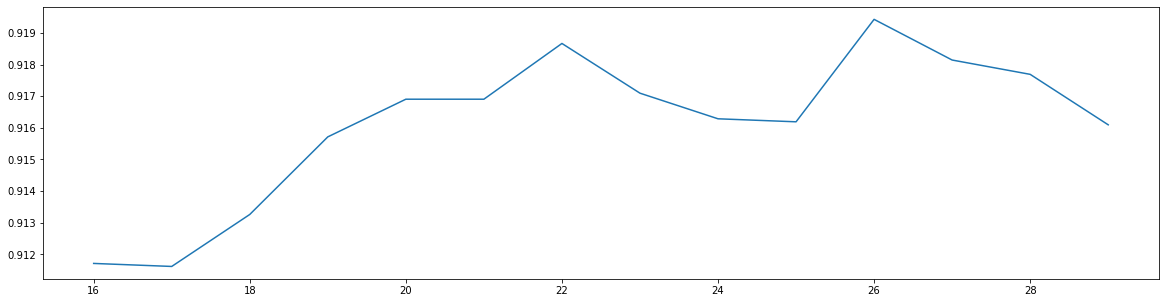

In [4]:
score = []
for i in range(16, 30):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10, random_state=0), X_dr, y, cv=5).mean()
    score.append(once)
plt.figure(figsize=[20, 5])
plt.plot(range(16, 30), score)
plt.show()

5. **导入找出的最佳维度进行降维，查看模型效果**

In [5]:
X_dr = PCA(26).fit_transform(X)
cross_val_score(RFC(n_estimators=10, random_state=0), X_dr, y, cv=5).mean()

0.918952380952381

模型效果还好，跑出了91.90%的水平，但还是没有我们使用嵌入法特征选择过后的96%高，有没有什么办法能够提高模型的表现呢？

6. **突发奇想，特征数量已经不足原来的3%，换模型怎么样？**

在之前的建模过程中，因为计算量太大，所以我们一直使用随机森林，但事实上，我们知道KNN的效果比随机森林更好，KNN在未调参的状况下已经达到96%的准确率，而随机森林在未调参前只能达到93%，这是模型本身的限制带来的，这个数据使用KNN效果就是会更好。现在我们的特征数量已经降到不足原来的3%，可以使用KNN了吗？

In [12]:
from sklearn.neighbors import KNeighborsClassifier as KNN

cross_val_score(KNN(), X_dr, y, cv=5).mean()  # 效果非常好

0.9710476190476192

7. **KNN的k值学习曲线**

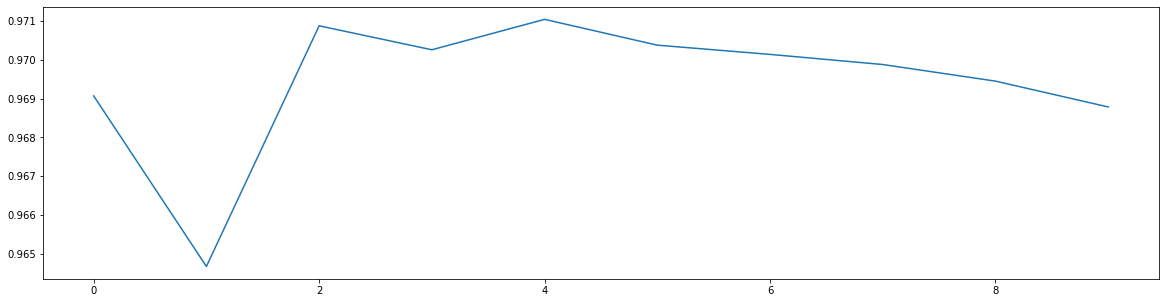

In [13]:
score = []
X_dr = PCA(26).fit_transform(X)
for i in range(10):
    once = cross_val_score(KNN(i + 1), X_dr, y, cv=5).mean()
    score.append(once)
plt.figure(figsize=[20, 5])
plt.plot(range(10), score)
plt.show()

8. **定下超参数后，模型效果如何，模型运行时间如何？**

In [14]:
cross_val_score(KNN(5), X_dr, y, cv=5).mean()

0.9710476190476192

可以发现，原本784列的特征被我们缩减到26列之后，用KNN跑出了目前位置这个数据集上最好的结果。再进行更细致的调整，我们也许可以将KNN的效果调整到98%以上。PCA为我们提供了无限的可能，终于不用再因为数据量太庞大而被迫选择更加复杂的模型了！